In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = "data/mouse_drug_data.csv"
clinical_trial = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug)
clinical = pd.read_csv(clinical_trial)
mouse.count()

# Combine the data into a single dataset
df = pd.merge(mouse,clinical,on= 'Mouse ID', how = 'inner')

# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
tumor_volume_mean_df= pd.DataFrame(tumor_volume_mean).reset_index()
# Preview DataFrame
tumor_volume_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_se = df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Preview DataFrame
tumor_volume_se_df = pd.DataFrame(tumor_volume_se).reset_index()
tumor_volume_se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot = pd.pivot_table(tumor_volume_mean_df, values = 'Tumor Volume (mm3)', index = 'Timepoint', columns = tumor_volume_mean_df['Drug'])
tumor_se_pivot = pd.pivot_table(tumor_volume_se_df, values = 'Tumor Volume (mm3)', index = 'Timepoint', columns = tumor_volume_se_df['Drug'])

# Preview
tumor_mean_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


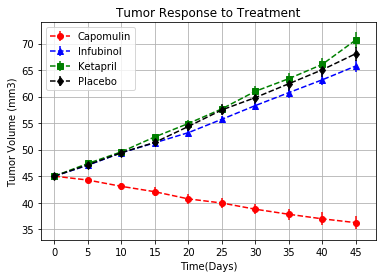

In [5]:
# Generate the Plot (with Error Bars)
plt.errorbar(x= tumor_mean_pivot.index, y= tumor_mean_pivot['Capomulin'],yerr=tumor_se_pivot['Capomulin'],fmt='ro--', label = 'Capomulin')
plt.errorbar(x= tumor_mean_pivot.index, y= tumor_mean_pivot['Infubinol'],yerr=tumor_se_pivot['Infubinol'],fmt='b^--', label = 'Infubinol')
plt.errorbar(x= tumor_mean_pivot.index, y= tumor_mean_pivot['Ketapril'],yerr=tumor_se_pivot['Ketapril'],fmt='gs--', label = 'Ketapril')
plt.errorbar(x= tumor_mean_pivot.index, y= tumor_mean_pivot['Placebo'],yerr=tumor_se_pivot['Placebo'],fmt='kd--', label = 'Placebo')
plt.grid()
plt.yticks(np.arange(35,75,5)) 
plt.ylim(35-2,75-1)
plt.xticks(tumor_mean_pivot.index)
plt.xlim(-2,max(tumor_mean_pivot.index)+3)
plt.legend()
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")


# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.tif")
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_mean = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
metastatic_mean_df = pd.DataFrame(metastatic_mean).reset_index()
# Preview DataFrame
metastatic_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_se = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
metastatic_se_df = pd.DataFrame(metastatic_se).reset_index()
# Preview DataFrame
metastatic_se_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_mean_pivot = pd.pivot_table(metastatic_mean_df, values = 'Metastatic Sites', index = 'Timepoint', columns = metastatic_mean_df['Drug'])
metastatic_se_pivot = pd.pivot_table(metastatic_se_df, values = 'Metastatic Sites', index = 'Timepoint', columns = metastatic_se_df['Drug'])
# Preview that Reformatting worked
metastatic_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


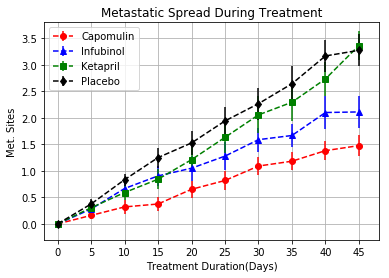

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(x= metastatic_mean_pivot.index, y= metastatic_mean_pivot['Capomulin'],yerr=metastatic_se_pivot['Capomulin'],fmt='ro--', label = 'Capomulin')
plt.errorbar(x= metastatic_mean_pivot.index, y= metastatic_mean_pivot['Infubinol'],yerr=metastatic_se_pivot['Infubinol'],fmt='b^--', label = 'Infubinol')
plt.errorbar(x= metastatic_mean_pivot.index, y= metastatic_mean_pivot['Ketapril'],yerr=metastatic_se_pivot['Ketapril'],fmt='gs--', label = 'Ketapril')
plt.errorbar(x= metastatic_mean_pivot.index, y= metastatic_mean_pivot['Placebo'],yerr=metastatic_se_pivot['Placebo'],fmt='kd--', label = 'Placebo')

plt.yticks(np.arange(0.0,4.0,0.5))
plt.ylim(-0.3,4.0-0.2)
plt.xticks(tumor_mean_pivot.index)
plt.xlim(-2,max(metastatic_mean_pivot.index)+3)
plt.legend()
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.grid()

# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment.tif")
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = df.groupby(['Drug', 'Timepoint'])["Mouse ID"].count()
# Convert to DataFrame
mouse_count_df = pd.DataFrame(mouse_count).reset_index()
# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_pivot = pd.pivot_table(mouse_count_df, values = 'Mouse ID', index = 'Timepoint', columns = mouse_count_df['Drug'])

# Preview the Data Frame
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


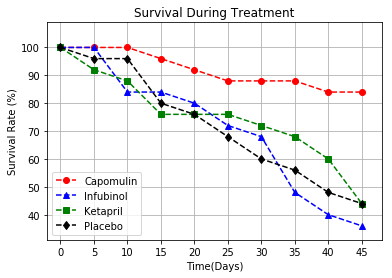

In [12]:
# Generate the Plot (Accounting for percentages)
plt.plot(mouse_count_pivot.index,mouse_count_pivot['Capomulin']/mouse_count_pivot.loc[0,'Capomulin']*100,'ro--',label = 'Capomulin')
plt.plot(mouse_count_pivot.index,mouse_count_pivot['Infubinol']/mouse_count_pivot.loc[0,'Infubinol']*100,'b^--',label = 'Infubinol')
plt.plot(mouse_count_pivot.index,mouse_count_pivot['Ketapril']/mouse_count_pivot.loc[0,'Ketapril']*100,'gs--',label = 'Ketapril')
plt.plot(mouse_count_pivot.index,mouse_count_pivot['Placebo']/mouse_count_pivot.loc[0,'Placebo']*100,'kd--',label = 'Placebo')

plt.grid()
plt.yticks(np.arange(40,110,10))
plt.ylim(40-9, 110-1)
plt.xticks(mouse_count_pivot.index)
plt.xlim(-2,max(mouse_count_pivot.index)+3)
plt.legend()
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")


# Save the Figure
plt.savefig("Survival_During_Treatment.tif")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percent_change = (tumor_mean_pivot.iloc[-1,:] - tumor_mean_pivot.iloc[0,:])/tumor_mean_pivot.iloc[0,:]*100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

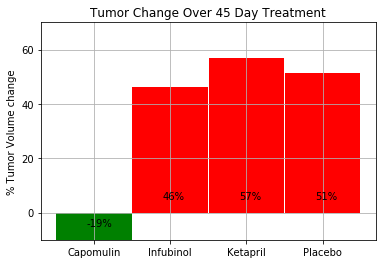

In [26]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = ((percent_change.index[0],percent_change[0]),
                        (percent_change.index[2],percent_change[2]),
                       (percent_change.index[3],percent_change[3]),
                       (percent_change.index[5],percent_change[5]))

# Splice the data between passing and failing drugs
pass_drug = percent_change_tuple[0]
fail_drug = percent_change_tuple[1:]

# Orient widths. Add labels, tick marks, etc. 
plt.bar(pass_drug[0], pass_drug[1], color = 'green', align = 'center', width = .99)
x = [f[0] for f in fail_drug]
height = [f[1] for f in fail_drug]
plt.bar(x,height, color = 'red', align = 'center', width = .99)
plt.yticks(np.arange(-20,80,20))
plt.ylim(-10,70)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume change")
plt.grid()
# Use functions to label the percentages of changes
def annotation(values):
    for n in range(len(values)):
        plt.annotate(str(values[n]) + "%", (n-.1,5*values[n]/abs(values[n])))

# Call functions to implement the function calls
percentages = [int(f[1]) for f in percent_change_tuple]
annotation(percentages)

# Save the Figure
plt.savefig("Tumor_Change_Over_45Days_Treatment.tif")

# Show the Figure
plt.show()